---
layout: post
title: Counting Ones Problem
excerpt: An introduction to genetic algorithms, via the Counting Ones Problem.
date: 2024-10-06
updatedDate: 2024-10-06
tags:
  - post
  - code
---

Genetic algorithms are a subset of evolutionary algorithms, in which we simulate the process of natural selection to evolve a population of solutions to a problem. To accomplish this, we need to represent the solutions in a way that allows us to perform the processes of natural selection (e.g. selection, mutation, and crossover operations).

One common way to represent solutions in genetic algorithms is to use binary strings (e.g. `b'01010101'` is an 8-bit binary string). Each bit in the string represents a different aspect of the solution, and we can use the tools of combinatorics to efficiently create large numbers of diverse solutions.

When iterating on solutions, we need a way to evaluate how good a solution is. One common approach is to assign a fitness score to the solution, which we can use to select the fittest solutions for breeding.

As a simple example, we could search for a particular bitstring pattern that maximizes a fitness function, and our fitness function could be the number of 1s in the bitstring.

$$
\text{Let } X = \{x_i\}_{i=1}^n \text{ where } x_i \in \{0, 1\} \\
f(x) = \sum_{i=1}^{n} x_i
$$

Equation 1: definition of the bitstring $X$ and the fitness function $f(x)$


### Let:

$n$ is the number of bits

$x = [0, 2^n-1]$ e.g. $x = 10101010$

$x_T = \text{rand}(x)$, the target value

$x_0 = \text{rand}(x)$, the initial value

$x_t$ is the current value at generation $t$

### Assume we have a fitness function $F(x)$
$F(x)$ returns the number of correct bits in the binary representation of $x$, that is, the number of bits that are the same as the corresponding bits in the target $x_T$.

$F(x) = \sum_{i=0}^{n}
  \begin{cases}
    1 & \text{if } x_i = x_T \\
    0 & \text{otherwise}
  \end{cases}$

We want to find the value of $x$ that maximizes the fitness function $F(x)$.

We can use a genetic algorithm to find this value.

### Genetic Algorithm

Each generation we mutate the current value $x_{t-1}$ to get a new value $x$.

We then calculate the fitness of the new value $x$ and compare it to the fitness of the current value $x_{t-1}$.

We then select the value with the highest fitness to be the current value $x$.

We repeat this process until the fitness of the current value $x$ is equal to the number of bits in $x$

i.e. until $F(x) = n$ or $x = x_T$.

In [22]:
from random import randint, seed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bits = 8

In [7]:
def Fitness(value: np.uint8, target: np.uint8) -> int:
    return value.bit_count()


In [8]:
def flip_bit(value: np.uint8, index: np.uint8) -> np.uint8:
    """Flip a specific bit in the given integer value."""
    return value ^ (1 << index)

def mutate(value: np.uint8) -> np.uint8:
    """Mutate the given integer value by flipping all bits with a probability of 1/bits."""
    for i in range(bits):
        if np.random.random() < 1/bits:
            value = flip_bit(value, i)
    return value

def adapt(value: np.uint8, target: np.uint8) -> np.uint8:
    """Adapt the given value towards the target by either keeping it or mutating it."""
    return max(value, mutate(value), key=lambda x: Fitness(x, target))

In [19]:
seed(1)
initial_value: np.uint8 = randint(0, 2**bits - 1)
target: np.uint8 = 2**bits - 1

print(f"Initial value: \t{initial_value:0{bits}b}")
print(f"Target value: \t{target:0{bits}b}")

value = initial_value
generation = 0
value_history = [value]
while Fitness(value, target) < bits:
    value = adapt(value, target)
    value_history.append(value)
    generation += 1

df = pd.DataFrame(np.array([value_history]).T, columns=['Value'])
df['bitstring'] = df['Value'].apply(lambda x: f"{x:0{bits}b}")
df['fitness'] = df['Value'].apply(lambda x: Fitness(x, target))
df['generation'] = df.index
df.head()

Initial value: 	01000100
Target value: 	11111111


,Value,bitstring,fitness,generation
0,68,01000100,2,0
1,68,01000100,2,1
2,22,00010110,3,2
3,30,00011110,4,3
4,30,00011110,4,4


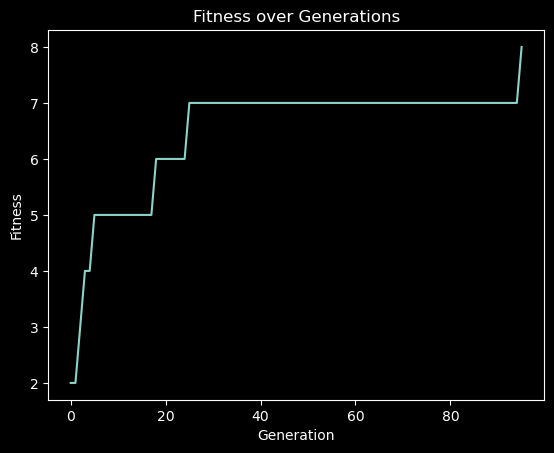

In [21]:
plt.plot(df['generation'], df['fitness'])
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness over Generations')
plt.show()


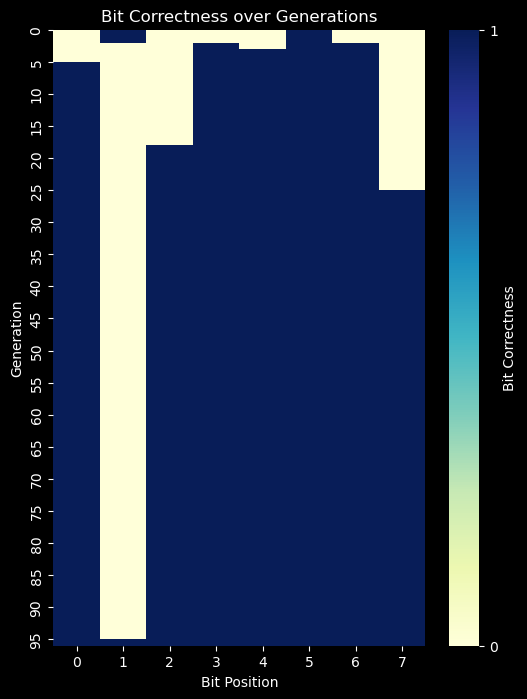

In [28]:
# Create a binary matrix where 1 represents a correct bit and 0 represents an incorrect bit
binary_matrix = df['bitstring'].apply(lambda x: [int(bit) == int(target_bit) for bit, target_bit in zip(x, f"{target:0{bits}b}")])

# Convert the list of lists to a numpy array
heatmap_data = np.array(binary_matrix.tolist())

# Create the heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Bit Correctness', 'ticks': [0, 1]})

plt.title('Bit Correctness over Generations')
plt.xlabel('Bit Position')
plt.ylabel('Generation')

# Adjust y-axis ticks to show every 5th generation
plt.yticks(np.arange(0, len(df), 5), df['generation'][::5])

# Adjust x-axis ticks to show bit positions
plt.xticks(np.arange(0.5, bits + 0.5), range(bits))

plt.show()
